# Sobre o conjunto de dados


Este conjunto de dados é originalmente do National Institute of Diabetes and Digestive and Kidney Diseases. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de ascendência indígena Pima.

Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas e uma variável alvo, Outcome. As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.


- *Gravidez*: Número de vezes que engravidou

- *Glicose*: Concentração plasmática de glicose em 2 horas em um teste oral de tolerância à glicose

- *Pressão arterial*: Pressão arterial diastólica (mm Hg)

- *Espessura da pele*: Espessura da prega cutânea do tríceps (mm)

- *Insulina*: Insulina sérica de 2 horas (mu U/ml)

- *IMC*: Índice de massa corporal (peso em kg/(altura em m)^2)

- *DiabetesPedigreeFunção*: Função de pedigree de diabetes

- *Idade*: Idade (anos)

- *Resultado*: Variável de classe (0 ou 1) 268 de 768 são 1, os outros são 0

In [11]:
import pandas as pd
from utils import get_summary
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# load dataset
df = pd.read_csv("data/diabetes.csv")
df.head()
features = df.columns[:-1]
label = df.columns[-1]
X = df[features]
y = df[label]

In [90]:
get_summary(df)

Number of rows: 768


,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
Pregnancies,int64,0,0.0,1,17.578125,17,...
Glucose,int64,0,0.0,99,2.213542,136,...
BloodPressure,int64,0,0.0,70,7.421875,47,...
SkinThickness,int64,0,0.0,0,29.557292,51,...
Insulin,int64,0,0.0,0,48.697917,186,...
BMI,float64,0,0.0,32.0,1.692708,248,...
DiabetesPedigreeFunction,float64,0,0.0,0.258,0.78125,517,...
Age,int64,0,0.0,22,9.375,52,...
Outcome,int64,0,0.0,0,65.104167,2,"[1, 0]"


In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratória das features

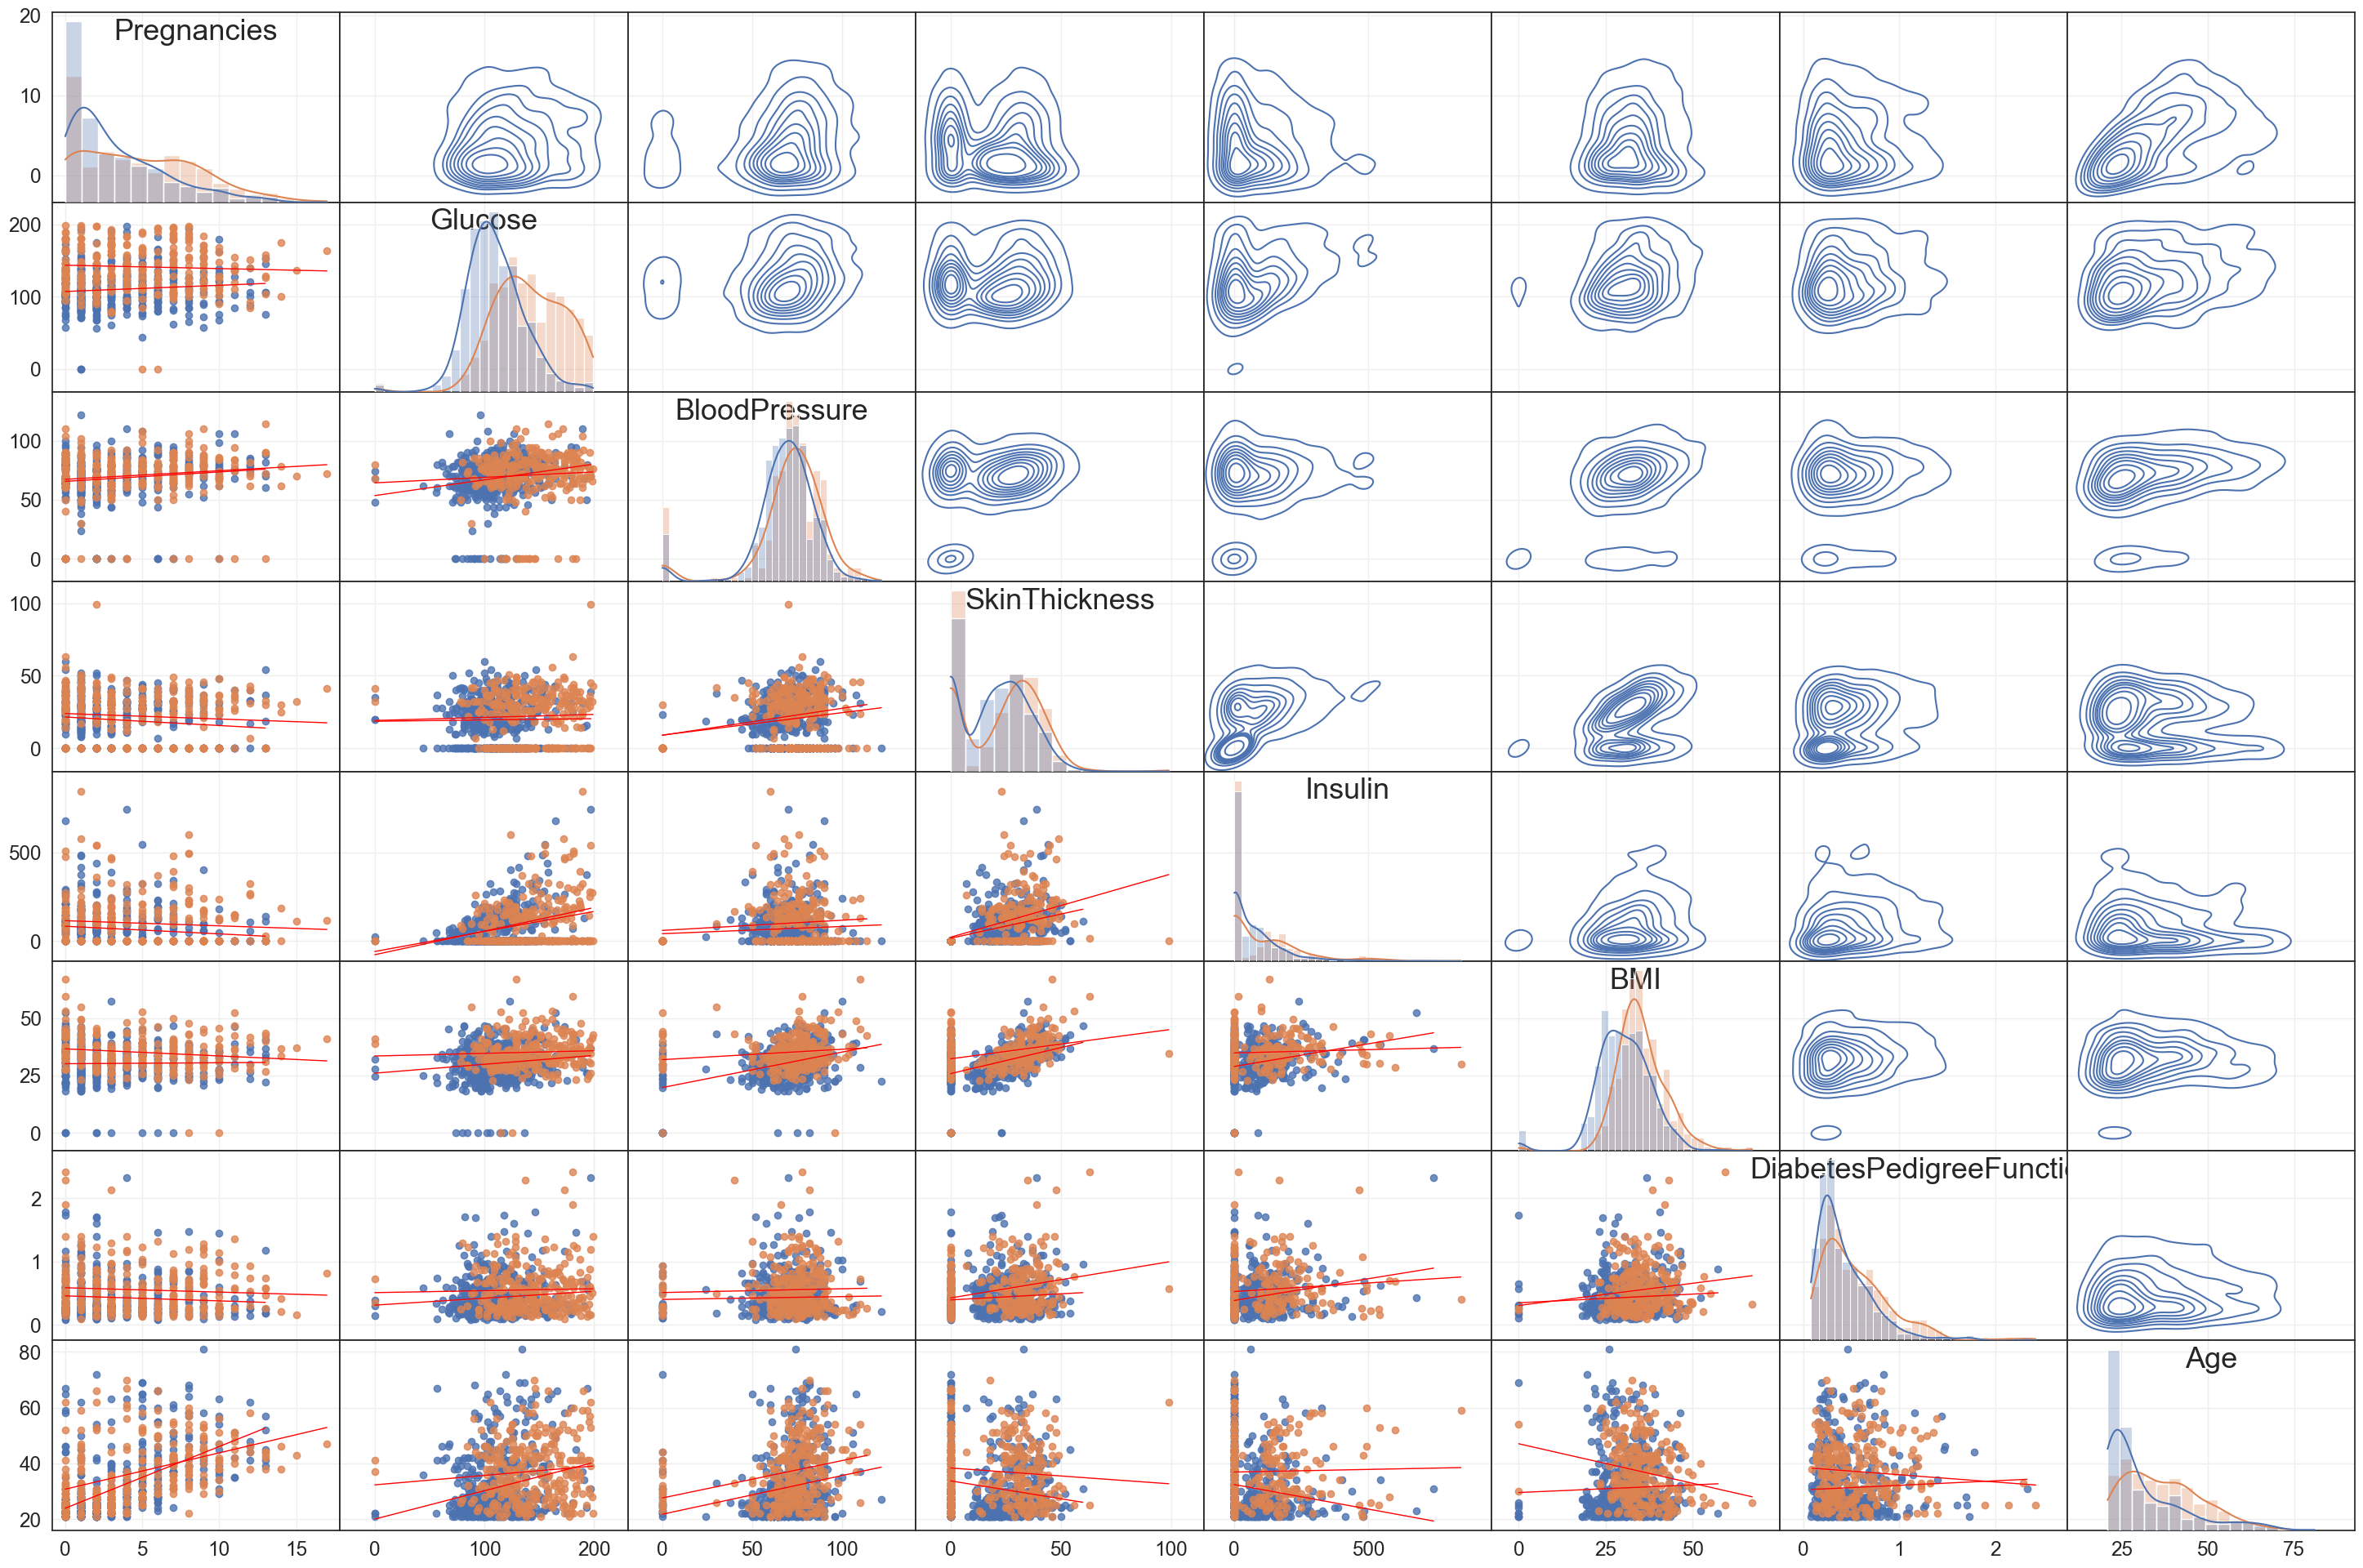

In [95]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
def style_ax(ax):
    # Axis styling
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(True)
    # ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')


def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)



def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)



sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, hue = label, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            # scatter_kws={'color': 'black', 's': 20}
            )
g.map_diag(sns.histplot,
           kde=True,
            stat='density',
            common_norm=False,
            alpha = 0.3
           )

# g.map_upper(corrdot, hue = None)
# g.map_upper(corrfunc, hue = None)
g.map_upper(sns.kdeplot, cmap="Blues_d", hue=None)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    style_ax(ax)

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df.columns):
    ax.set_title(col, y=0.82, fontsize=26)

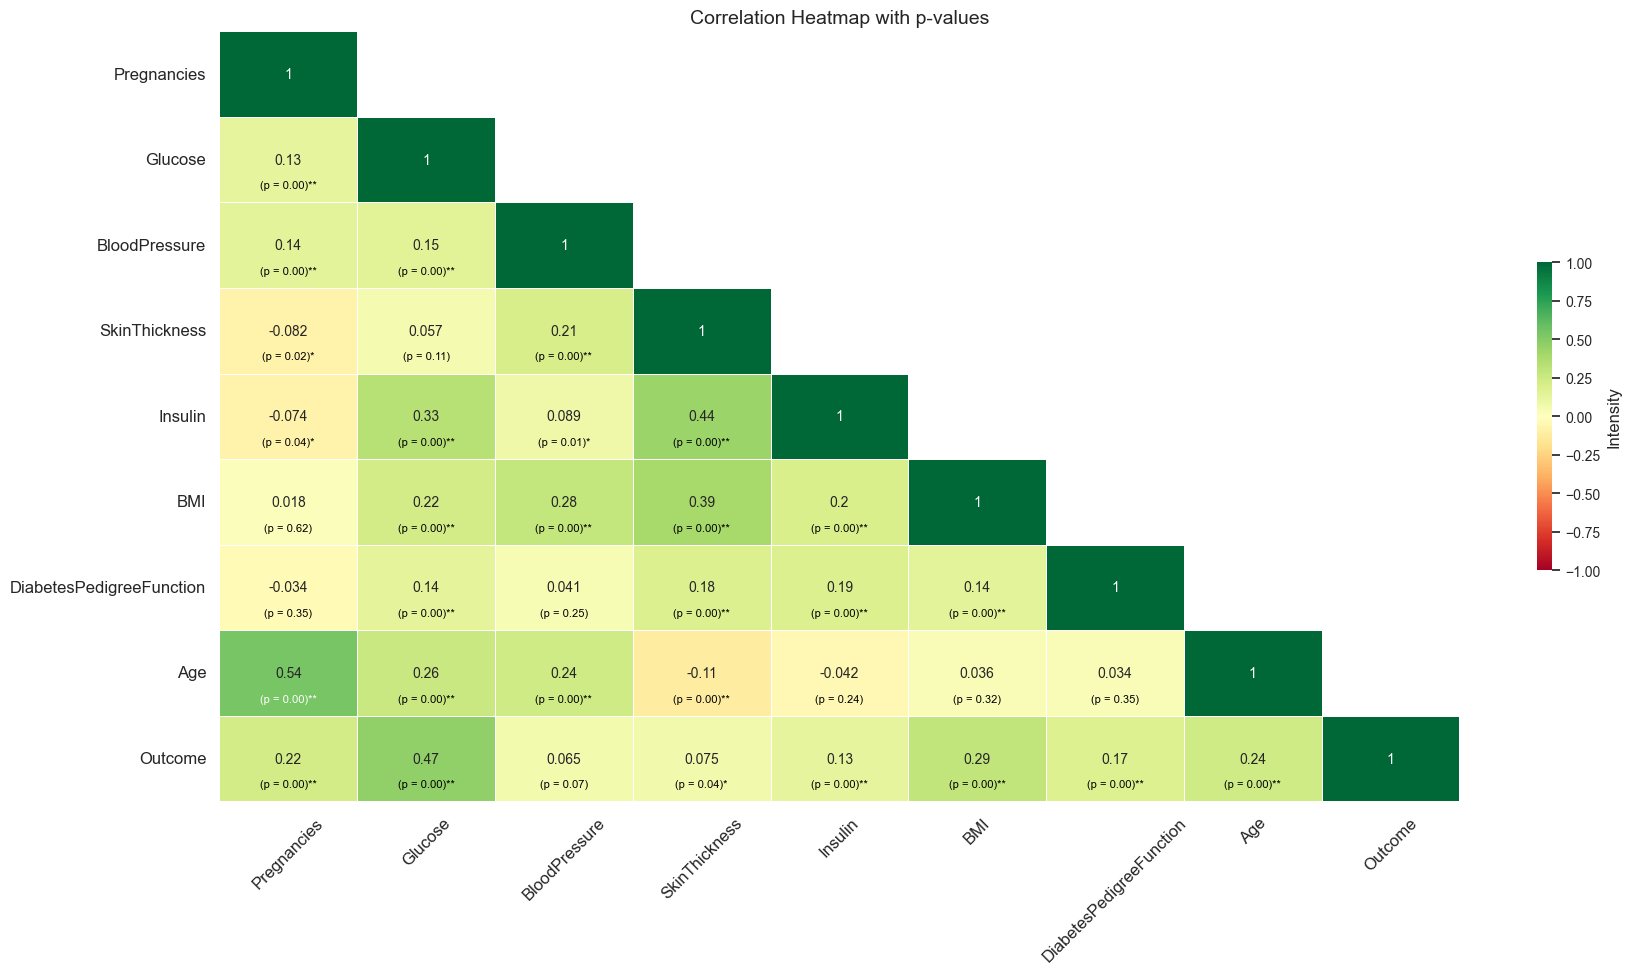

In [139]:

import textwrap
from scipy.stats import pearsonr
# from scipy.stats import spearmanr
# from scipy.stats import kendalltau

def corr_heatmap_with_pval(df, method='pearson', figsize=(10, 10), title=None):
    """
    df: dataframe to be used. Ensured the dataframe has been sliced to contain only the column you need. It accepts only numerical columns
    method: default uses the pearson method. It overall permits 3 methods; 'pearson', 'spearman' and 'kendall'
    figsize: default is (20, 10) but you can change it based on your preference
    title: Specify the title for your chart, default is None
    """
    # Make a copy of the df
    data = df.copy()
    
    # Check features correlation
    corr = data.corr(method=method)
    

    # Create a mask to hide the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set the diagonal elements of the mask to False to display self-correlation
    np.fill_diagonal(mask, False)

    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title, fontsize=14)

    # Create the heatmap with the custom mask
    heatmap = sns.heatmap(corr,
        annot=True,
        annot_kws={"fontsize": 10},  # Adjust annotation font size
        # cbar_kws={"shrink": .4, 'label': f'{method.capitalize()} Correlation', 'orientation': 'vertical'}, e set a fontesize das ticks para 8 e do label para 10
        cbar_kws={"shrink": .4, 'label': f'{method.capitalize()} Correlation', 'orientation': 'vertical'},
        linewidths=0.5,
        cmap='RdYlGn', vmin=-1, vmax=1,
        mask=mask,
        center=0,      # The center value of the legend. With divergent cmap, where white is
        # square=True,   # Force cells to be square
        ax=ax)

    # Create a function to calculate and format p-values
    p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[1]):
            x = data.iloc[:, i]
            y = data.iloc[:, j]
            mask = ~np.logical_or(np.isnan(x), np.isnan(y))
            if np.sum(mask) > 0:
                if method == 'pearson':
                    p_values[i, j] = pearsonr(x[mask], y[mask])[1]
                elif method == 'kendall':
                    p_values[i, j] = kendalltau(x[mask], y[mask])[1]
                elif method == 'spearman':
                    p_values[i, j] = spearmanr(x[mask], y[mask])[1]

    p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

    # Create a mask for the p-values heatmap
    mask_pvalues = np.triu(np.ones_like(p_values), k=1)

    # Calculate the highest and lowest correlation coefficients
    max_corr = np.max(corr.max())
    min_corr = np.min(corr.min())

    # Annotate the heatmap with p-values and change text color based on correlation value
    for i in range(p_values.shape[0]):
        for j in range(p_values.shape[1]):
            if mask_pvalues[i, j]:
                p_value = p_values.iloc[i, j]
                if not np.isnan(p_value):
                    correlation_value = corr.iloc[i, j]
                    text_color = 'white' if abs(correlation_value) >= 0.5 else 'black'
                    if p_value <= 0.01:
                        # Include double asterisks for p-value <= 0.01
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
                    elif p_value <= 0.05:
                        # Include single asterisks for p-value <= 0.05
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
                    else:
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
    # rotate labels
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Intensity', fontsize=12)  # Tamanho da fonte do título
    colorbar.ax.tick_params(labelsize=10)  # Tamanho da fonte dos números
    # set the labels to size 10
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.grid(False)
    return fig, ax

fig, ax = corr_heatmap_with_pval(df, method='pearson', figsize=(20, 10), title='Correlation Heatmap with p-values')
plt.show()

# Explorando as Métricas WOE e IV para Seleção e Interpretação de Variáveis

No contexto de modelos de **regressão logística**, duas métricas essenciais para avaliar a qualidade e relevância das variáveis preditoras são o **Weight of Evidence (WoE)** e o **Information Value (IV)**. Essas ferramentas são amplamente utilizadas na modelagem preditiva, especialmente quando o objetivo é identificar variáveis que melhor discriminam entre diferentes resultados (como fraudes e não fraudes, inadimplentes e pagadores, etc.).

## O que é WoE (Weight of Evidence)?

O **Weight of Evidence (WoE)** mede a discriminação de uma variável em relação ao resultado alvo, analisando a relação entre os valores da variável e a ocorrência do evento. Ele transforma variáveis categóricas ou contínuas em um único valor que indica se uma categoria favorece ou não a ocorrência de um determinado resultado.

### Fórmula para WoE:

A fórmula básica para calcular o WoE é a seguinte:
$$
\text{WoE}_i = \ln\left(\frac{\frac{\text{Freq}_i \, (\text{não alvo})}{\text{Total} \, (\text{não alvo})}}{\frac{\text{Freq}_i \, (\text{alvo})}{\text{Total} \, (\text{alvo})}}\right)
$$

Onde:
- \( \text{Freq}_i \, (\text{não alvo}) \) é a frequência de não ocorrência do evento na categoria \(i\).
- \( \text{Freq}_i \, (\text{alvo}) \) é a frequência de ocorrência do evento na categoria \(i\).
- O logaritmo natural (ln) é usado para normalizar a razão.

Valores positivos de WoE indicam que a categoria favorece o **não evento** (não ocorrência do alvo), enquanto valores negativos indicam que a categoria favorece o **evento** (ocorrência do alvo).

### Interpretação do WoE

- Quanto mais distante de zero, maior é o poder de discriminação da variável.
- Um WoE positivo sugere que a variável **reduz** a chance do evento.
- Um WoE negativo sugere que a variável **aumenta** a chance do evento.

## O que é IV (Information Value)?

O **Information Value (IV)** mede o poder preditivo de uma variável ao somar as contribuições de todas as categorias dessa variável em relação ao desvio da uniformidade (distribuição esperada vs. distribuição observada). Ele ajuda a avaliar se a variável, como um todo, tem valor preditivo significativo para o modelo.

### Fórmula para IV:
$$

IV = \sum_i (\text{Proporção}_i \, (\text{não alvo}) - \text{Proporção}_i \, (\text{alvo})) \times \text{WoE}_i

$$

Onde:
- $( \text{Proporção}_i \, (\text{não alvo}) )$ é a proporção de não ocorrência do evento na categoria $(i)$.
- $( \text{Proporção}_i \, (\text{alvo}) )$ é a proporção de ocorrência do evento na categoria $(i)$.
- $( \text{WoE}_i )$ é o Weight of Evidence da categoria $(i)$.

O IV soma a diferença entre as proporções de cada grupo multiplicada pelo seu WoE, refletindo o quão bem a variável prediz o evento.

## Interpretação do IV

Abaixo está uma tabela que classifica o **Information Value** (IV) e seu poder preditivo:

| IV        | Classificação               |
|-----------|-----------------------------|
| ≤ 0.02    | Não útil para previsão       |
| 0.02 - 0.1| Poder preditivo fraco        |
| 0.1 - 0.3 | Poder preditivo moderado     |
| 0.3 - 0.5 | Poder preditivo forte        |
| > 0.5     | Suspeita de superajuste      |

### Considerações sobre IV

- Um valor de **IV muito alto** (acima de 0.5) pode indicar que a variável está **superajustada** ou apresenta um comportamento inesperado, o que merece investigação adicional.
- Para variáveis categóricas, um IV próximo de **0.3** a **0.5** geralmente reflete um bom poder preditivo.

## Como Usar WoE e IV no Contexto de Modelagem?

### Seleção de Variáveis
Variáveis com IV na faixa de **0.1 a 0.3** devem ser consideradas no processo de seleção de variáveis para um modelo de regressão logística, pois apresentam um equilíbrio entre discriminação e generalização. Já variáveis com **IV muito baixo** podem ser descartadas.

### Transformação de Variáveis com WoE
O WoE permite transformar variáveis categóricas em variáveis contínuas que podem ser diretamente utilizadas em regressão logística, garantindo que as variáveis estejam linearmente relacionadas ao log-odds do alvo.

### Vantagens do Uso de WoE e IV

- **Interpretação Intuitiva**: Permite interpretar facilmente se uma categoria favorece ou não a ocorrência do evento.
- **Redução de Multicolinearidade**: O uso de WoE pode reduzir a multicolinearidade ao transformar variáveis categóricas em contínuas.
- **Manuseio de Valores Nulos**: É fácil lidar com categorias com valores nulos (ou raras) utilizando WoE e IV, atribuindo valores adequados durante a transformação.

Essas métricas são amplamente usadas em modelos preditivos em áreas como crédito, seguro, marketing e risco, proporcionando insights valiosos sobre o comportamento das variáveis no contexto de modelagem preditiva.

In [194]:
from sklearn.tree import DecisionTreeClassifier
class TreeBinarizer:
    def __init__(self, df, var_list, target):
        self.df = df.copy()
        self.var_list = var_list
        self.target = target
        self.binarized = {}
        self.binarize()
    
    def binarize(self, max_depth=3):
        for var in self.var_list:
            clf = DecisionTreeClassifier(max_depth=max_depth)
            clf.fit(df[var].values.reshape(-1, 1), df[target])
            tree_splits = clf.tree_.threshold[clf.tree_.feature != -2]
            bins = np.unique(tree_splits)
            bins = np.sort(bins)
            bins = np.insert(bins, 0, -np.inf)
            bins = np.append(bins, np.inf)
            bins = np.round(bins, 2)
            self.binarized[var] = bins
        return self.binarized
    
    def transform(self, max_depth=3, labels: bool = False):
        self.binarize(max_depth)
        labels_dict = {}
        for var in self.var_list:
            bins = self.binarized[var]
            # cria labels com os intervalos
            labels = [f'[{bins[i]}, {bins[i+1]})' for i in range(len(bins) - 1)]
            labels_dict[var] = labels
            self.df[var] = pd.cut(self.df[var], bins=bins, labels=labels, include_lowest=True)
            self.df[var] = self.df[var].astype('category')
        if labels:
            return self.df, labels_dict
        return self.df

df_binarized , labels_dict = TreeBinarizer(df, features, label).transform(max_depth=2)
df_binarized['Outcome'] = df['Outcome']
get_summary(df_binarized)

Number of rows: 768


,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
Pregnancies,category,0,0.0,"[-inf, 2.5)",45.442708,4,"[[2.5, 6.5), [-inf, 2.5), [6.5, 13.5), [13.5, ..."
Glucose,category,0,0.0,"[99.5, 127.5)",37.5,4,"[[127.5, 154.5), [-inf, 99.5), [154.5, inf), [..."
BloodPressure,category,0,0.0,"[69.0, 81.0)",37.109375,4,"[[69.0, 81.0), [42.0, 69.0), [-inf, 42.0), [81..."
SkinThickness,category,0,0.0,"[7.5, 31.5)",41.666667,4,"[[31.5, 61.5), [7.5, 31.5), [-inf, 7.5), [61.5..."
Insulin,category,0,0.0,"[-inf, 14.5)",48.828125,4,"[[-inf, 14.5), [14.5, 121.0), [121.0, 452.5), ..."
BMI,category,0,0.0,"[29.85, 40.85)",51.041667,4,"[[29.85, 40.85), [26.35, 29.85), [-inf, 26.35)..."
DiabetesPedigreeFunction,category,0,0.0,"[0.21, 0.53)",47.65625,4,"[[0.54, inf), [0.21, 0.53), [-inf, 0.21), [0.5..."
Age,category,0,0.0,"[28.5, 62.5)",49.479167,4,"[[28.5, 62.5), [-inf, 24.5), [24.5, 28.5), [62..."
Outcome,int64,0,0.0,0,65.104167,2,"[1, 0]"


In [195]:
def iv_woe(df, target):
    df_iv,df_woe = pd.DataFrame(), pd.DataFrame()
    data = df.copy()
    #Extract Column Names
    cols = data.columns
    def classify_iv(iv):
        if iv < 0.02:
            return 'Useless for prediction'
        elif iv < 0.1:
            return 'Weak predictor'
        elif iv < 0.3:
            return 'Medium predictor'
        elif iv < 0.5:
            return 'Strong predictor'
        else:
            return '**Strong predictor'
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        d = data.groupby(ivars, as_index=False, observed=True).agg({target: ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        df_iv=pd.concat([df_iv,temp], axis=0)
        df_iv['Classificacao'] = df_iv['IV'].apply(classify_iv)
        df_woe=pd.concat([df_woe,d], axis=0)
    return df_iv, df_woe

df_iv, df_woe = iv_woe(df_binarized, label)
df_iv


,Variable,IV,Classificacao
0,Pregnancies,0.298075,Medium predictor
0,Glucose,1.295290,**Strong predictor
0,BloodPressure,0.150837,Medium predictor
0,SkinThickness,0.191236,Medium predictor
0,Insulin,0.407836,Strong predictor
0,BMI,0.682584,**Strong predictor
0,DiabetesPedigreeFunction,0.166879,Medium predictor
0,Age,0.574057,**Strong predictor


In [196]:
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [199]:
for var in labels_dict.keys():
    df_binarized[var] = df_binarized[var].cat.codes
    df_binarized[var] = df_binarized[var].astype('int')

get_summary(df_binarized)

Number of rows: 768


,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
Pregnancies,int64,0,0.0,0,45.442708,4,"[1, 0, 2, 3]"
Glucose,int64,0,0.0,1,37.5,4,"[2, 0, 3, 1]"
BloodPressure,int64,0,0.0,2,37.109375,4,"[2, 1, 0, 3]"
SkinThickness,int64,0,0.0,1,41.666667,4,"[2, 1, 0, 3]"
Insulin,int64,0,0.0,0,48.828125,4,"[0, 1, 2, 3]"
BMI,int64,0,0.0,2,51.041667,4,"[2, 1, 0, 3]"
DiabetesPedigreeFunction,int64,0,0.0,1,47.65625,4,"[3, 1, 0, 2]"
Age,int64,0,0.0,2,49.479167,4,"[2, 0, 1, 3]"
Outcome,int64,0,0.0,0,65.104167,2,"[1, 0]"


In [216]:
x_train_bin, x_test_bin, y_train, y_test = train_test_split(df_binarized[features], df_binarized[label], test_size=0.2, random_state=42)
x_train_bin = sm.add_constant(x_train_bin)
x_test_bin = sm.add_constant(x_test_bin)

# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_train, x_train_bin, family=families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.20
Date:                Fri, 06 Sep 2024   Deviance:                       526.41
Time:                        20:22:21   Pearson chi2:                     522.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

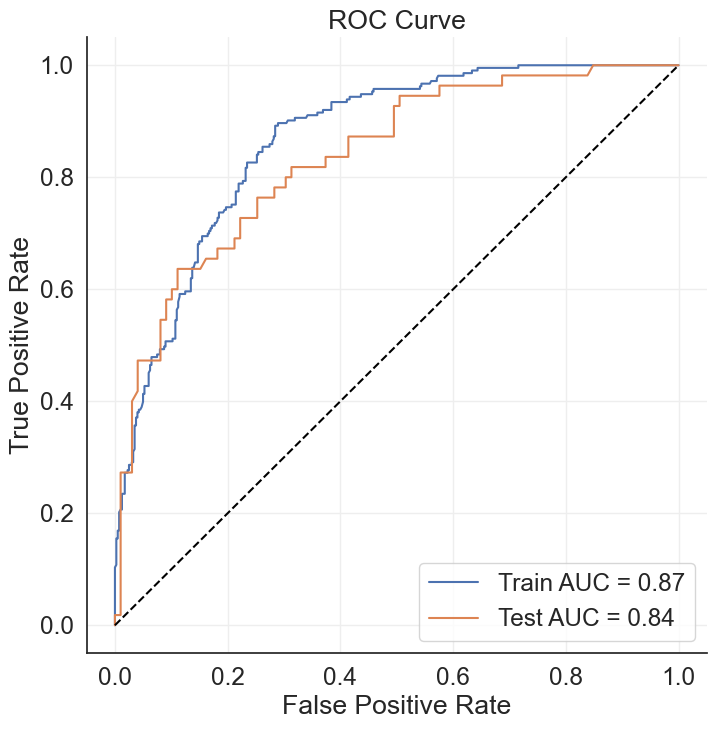

In [217]:
# roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def style_ax(ax):
    # Axis styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')
    
def plot_roc_curve(train: tuple, test: tuple):
    (y_true, y_pred) = train
    (y_true_test, y_pred_test) = test
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
    roc_auc = roc_auc_score(y_true, y_pred)
    roc_auc_test = roc_auc_score(y_true_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, label=f"Train AUC = {roc_auc:.2f}")
    ax.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_test:.2f}")
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()
    style_ax(ax)
    plt.show()
    
y_pred_train = logit_results.predict(x_train_bin)
y_pred_test = logit_results.predict(x_test_bin)

plot_roc_curve(train=(y_train, y_pred_train), test=(y_test, y_pred_test))


In [230]:
# Contagem de eventos e não eventos para cada bin
grouped = df_binarized.groupby([var])[target].agg(['count', 'sum'])
grouped['non_event'] = grouped['count'] - grouped['sum']

# Calcular as proporções de eventos e não eventos
grouped['event_prop'] = grouped['sum'] / grouped['sum'].sum()
grouped['non_event_prop'] = grouped['non_event'] / grouped['non_event'].sum()

# Calcular o WoE
grouped['woe'] = -1*(np.log(grouped['non_event_prop'] / grouped['event_prop']))

# Retornar apenas o WoE
woe_map = grouped['woe'].to_dict()

# Substituir os valores da variável original pelos valores WoE
for var in labels_dict.keys():
    woe_var = 'woe_' + var
    df_binarized[woe_var] = df_binarized[var].map(woe_map)

df_binarized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,woe_Pregnancies,woe_Glucose,woe_BloodPressure,woe_SkinThickness,woe_Insulin,woe_BMI,woe_DiabetesPedigreeFunction,woe_Age
0,1,2,2,2,0,2,3,2,1,-0.369631,0.655203,0.655203,0.655203,-1.178834,0.655203,-0.823298,0.655203
1,0,0,1,1,0,1,1,2,0,-1.178834,-1.178834,-0.369631,-0.369631,-1.178834,-0.369631,-0.369631,0.655203
2,2,3,1,0,0,0,3,2,1,0.655203,-0.823298,-0.369631,-1.178834,-1.178834,-1.178834,-0.823298,0.655203
3,0,0,1,1,1,1,0,0,0,-1.178834,-1.178834,-0.369631,-0.369631,-0.369631,-0.369631,-1.178834,-1.178834
4,0,2,0,2,2,3,3,2,1,-1.178834,0.655203,-1.178834,0.655203,0.655203,-0.823298,-0.823298,0.655203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2,1,2,2,2,2,0,3,0,0.655203,-0.369631,0.655203,0.655203,0.655203,0.655203,-1.178834,-0.823298
764,0,1,2,1,0,2,1,1,0,-1.178834,-0.369631,0.655203,-0.369631,-1.178834,0.655203,-0.369631,-0.369631
765,1,1,2,1,1,0,1,2,0,-0.369631,-0.369631,0.655203,-0.369631,-0.369631,-1.178834,-0.369631,0.655203
766,0,1,1,0,0,2,1,2,1,-1.178834,-0.369631,-0.369631,-1.178834,-1.178834,0.655203,-0.369631,0.655203


In [223]:
list_woe_vars = [f'woe_{var}' for var in features]
x_train_woe, x_test_woe, y_train, y_test = train_test_split(df_binarized[list_woe_vars], df_binarized[label], test_size=0.2, random_state=42)
x_train_woe = sm.add_constant(x_train_woe)
x_test_woe = sm.add_constant(x_test_woe)

# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_train, x_train_woe, family=families.Binomial()).fit()
print(logit_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -337.37
Date:                Sun, 08 Sep 2024   Deviance:                       674.75
Time:                        11:11:48   Pearson chi2:                     598.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1748
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [233]:
# get woe_var with negative beta
woe_vars = logit_results.params[1:]
woe_vars = woe_vars[woe_vars < 0]
woe_vars_neg_beta = woe_vars.index
woe_vars_neg_beta

Index(['woe_BloodPressure'], dtype='object')

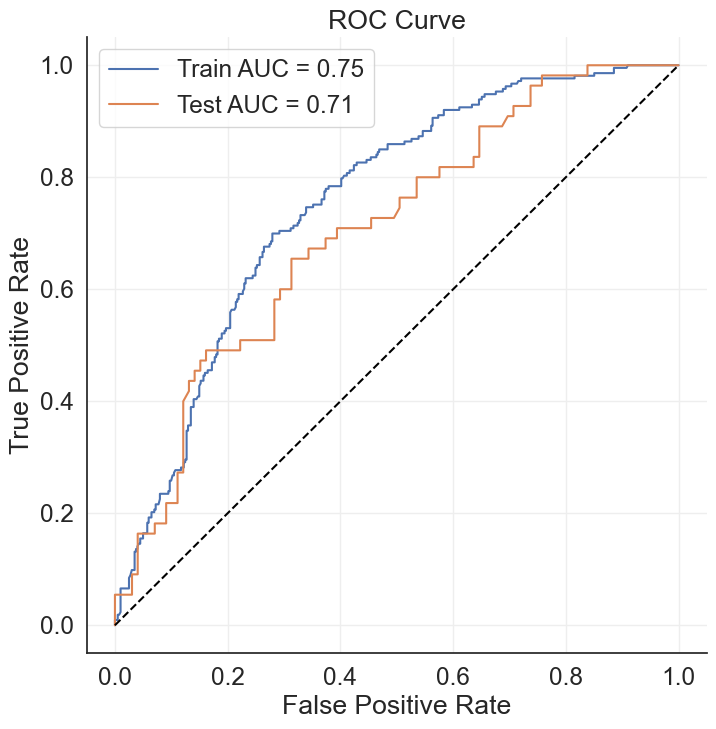

In [224]:
y_pred_train = logit_results.predict(x_train_woe)
y_pred_test = logit_results.predict(x_test_woe)

plot_roc_curve(train=(y_train, y_pred_train), test=(y_test, y_pred_test))


In [228]:
from sklearn.metrics import balanced_accuracy_score
trshould_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in trshould_list:
    y_pred_test = (logit_results.predict(x_test_woe) > threshold).astype(int)
    print(f'Threshold: {threshold}')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
    print(f'Accuracy: {balanced_accuracy:.2f}')
    print('---'*20)

Threshold: 0.5
Accuracy: 0.64
------------------------------------------------------------
Threshold: 0.6
Accuracy: 0.55
------------------------------------------------------------
Threshold: 0.7
Accuracy: 0.53
------------------------------------------------------------
Threshold: 0.8
Accuracy: 0.50
------------------------------------------------------------
Threshold: 0.9
Accuracy: 0.50
------------------------------------------------------------


In [229]:
trshould_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in trshould_list:
    # predictions without woe
    y_pred_test = (logit_results.predict(x_test_bin) > threshold).astype(int)
    print(f'Threshold: {threshold}')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
    print(f'Accuracy: {balanced_accuracy:.2f}')
    print('---'*20)

Threshold: 0.5
Accuracy: 0.51
------------------------------------------------------------
Threshold: 0.6
Accuracy: 0.54
------------------------------------------------------------
Threshold: 0.7
Accuracy: 0.56
------------------------------------------------------------
Threshold: 0.8
Accuracy: 0.61
------------------------------------------------------------
Threshold: 0.9
Accuracy: 0.65
------------------------------------------------------------


In [234]:
# fit the model removing woe_vars_neg_beta
list_woe_vars = [f'woe_{var}' for var in features]
list_woe_vars = list(set(list_woe_vars) - set(woe_vars_neg_beta))
x_train_woe, x_test_woe, y_train, y_test = train_test_split(df_binarized[list_woe_vars], df_binarized[label], test_size=0.2, random_state=42)
x_train_woe = sm.add_constant(x_train_woe)
x_test_woe = sm.add_constant(x_test_woe)

# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_train, x_train_woe, family=families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      606
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -337.75
Date:                Mon, 09 Sep 2024   Deviance:                       675.50
Time:                        10:15:35   Pearson chi2:                     598.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1737
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

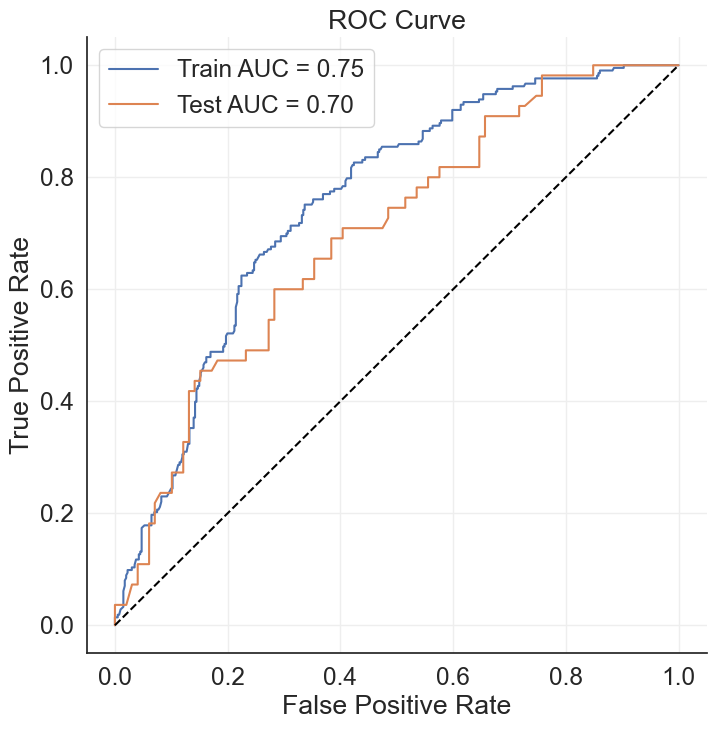

In [235]:
y_pred_train = logit_results.predict(x_train_woe)
y_pred_test = logit_results.predict(x_test_woe)

plot_roc_curve(train=(y_train, y_pred_train), test=(y_test, y_pred_test))